# TP2 - scaling, différences finies et méthode du gradient

In [1]:
%pylab inline

from scipy.optimize import minimize
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Exercice 1 - intérêt de la mise à l'échelle ("scaling") en optimisation

Considérons la fonction de deux variables réelles suivante :
$$
f_{M}(x,y) = (x-M)^4+(x-M)^2+\left(y-\dfrac{1}{M}\right)^4+\left(y-\dfrac{1}{M}\right)^2.
$$

+ En utilisant la fonction *minimize* de la bibliothèque *scipy.optimize*, chercher une solution approchée $(x^*,y^*)$ de la minimisation de cette fonction $f_{M}$ en partant du point $(1,1)$ et en utilisant l'option *Nelder-Mead*.
Observer ce qui se passe lorsque $M >> 1$, par exemple $M = 10^9$.

+ Ensuite, construire la fonction $f^S_M$ définie par 
$$
f^S_{M}(u,v) = f_M\left(Mu,\dfrac{v}{M}\right)
$$
et chercher une solution approchée $(u^*,v^*)$ de la minimisation de cette fonction $f^S_{M}$ en partant du point $\left(\dfrac{1}{M},M\right)$.

+ Comparer $(x^*,y^*)$ et $\left(M u^*,\dfrac{v^*}{M}\right)$.

Remarque : on ajoutera *options={'disp': True, 'maxiter':1000}* dans les appels à *minimize*.

In [ ]:
def f_M(x,M) :
    return((x[0]-M)**4+(x[0]-M)**2+(x[1]-1/M)**4+(x[1]-1/M)**2)
M = 10**9
x0=[1,1]
minimize(f_M,x0, args =(M),method='Nelder-Mead',options={'disp':True, 'maxiter':1000})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 260
         Function evaluations: 467


 final_simplex: (array([[ 1.00000000e+09,  1.29113993e-05],
       [ 1.00000000e+09,  1.56658634e-05],
       [ 1.00000000e+09, -4.61131628e-05]]), array([1.04070282e-09, 2.57632340e-09, 3.23270316e-09]))
           fun: 1.040702818408262e-09
       message: 'Optimization terminated successfully.'
          nfev: 467
           nit: 260
        status: 0
       success: True
             x: array([1.00000000e+09, 1.29113993e-05])

In [ ]:
#x1 = (u,v)
def f_S(x,M) :
    u = x[0]*M
    v = x[1]/M
    return((u-M)**4+(u-M)**2+(v-1/M)**4+(v-1/M)**2)
M = 10**9
x1=[1/M,M]
x1_final = minimize(f_S,x1, args =(M),method='Nelder-Mead',options={'disp':True, 'maxiter':1000})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 314
         Function evaluations: 562


In [ ]:
print(x1_final['x'][0]*10**9,x1_final['x'][1]/10**9)

1000000000.0 9.999700518744351e-10


In [ ]:
#Pourquoi? Parce que premier cas, x et y sont très différents (grand écart). 
#Alors que second cas x et y sont du même ordre de grandeur
import numpy as np
0.1+0.1+0.1-0.3
print(finfo(float).eps)

2.220446049250313e-16


# Exercice 2 - approximation d'un gradient et d'une matrice hessienne par différences finies

On se rappelle qu'une approximation de la dérivée $f'(x)$ d'une fonction $f$ définie, continue et dérivable sur $\mathbb{R}$ est simplement, pour $h$ petit, 
$a_h := \dfrac{f(x+h)-f(x)}{h}.$
On a alors $|a_h-f'(x)| = O(h)$.

On généralise aisément cela au cas d'une fonction $f$ à valeurs réelles définie sur $\mathbb{R}^n$. En effet, si on note $e_i$ le $i$-ème vecteur de la base canonique de $\mathbb{R}^n$, la $i$-ème composante de $\nabla f(x)$ est approchée par
$$
\dfrac{f(x+he_i)-f(x)}{h}.
$$

De manière analogue, on peut approcher la composante $(i,j)$ de la matrice hessienne de $f$ en $x$ par 
$$
\dfrac{f(x+he_i+he_j)-f(x+he_i)-f(x+he_j)+f(x)}{h^2}.
$$

+ Ecrire une fonction **FDgrad(f,x,h)** qui calcule une approximation du gradient de la fonction $f$ au point $x$ en prenant un pas $h$.

+ Tester cette fonction pour une fonction $f$ dont vous connaissez le gradient (par exemple la fonction de Rosenbrock) et observez son comportement lorsque $h$ varie dans l'ensemble $\left\{10^{-k}, k = 1, 2, ... 16\right\}$. Pour ce faire, on pourra faire afficher l'erreur commise par rapport au gradient exact.

+ Ecrire une fonction **FDhess(f,x,h)** qui calcule une approximation de la matrice hessienne de la fonction $f$ au point $x$ en prenant un pas $h$.

+ Tester cette fonction pour une fonction $f$ dont vous connaissez la matrice hessienne et observez son comportement lorsque $h$ varie.

In [ ]:
def FDgrad(f,x,h) :
    gradient = []
    identite = np.identity(len(x))
    for i in range(len(x)):
        gradient.append((f(x+identite[i]*h)-f(x))/h)
    return(gradient)

def f(x) :
    return((1-x[0])**2 + 10*(x[1]-x[0]**2)**2)

h = [10**(-k)for k in range(16)]
x = [1,0]
gradient_calcule = []
gradient_attendu = [40,-20]
erreur = []
for i in range(len(h)) :
    gradient_calcule.append(FDgrad(f,x,h[i]))
    erreur.append(abs(gradient_calcule[i][0]-gradient_attendu[0])+abs(gradient_calcule[i][1]-gradient_attendu[1]))

[121.0, 7.510000000000048, 0.714010000000016, 0.07104000999326843, 0.007100400007971075, 0.0007100042753904745, 7.099667300280998e-05, 7.125986485334579e-06, 1.6825879356474616e-07, 3.431164259382058e-06, 4.964422259945422e-06, 4.964422259945422e-06, 0.0035576781010604464, 0.03374912514118478, 0.13677451221155934, 4.8689957516035065]


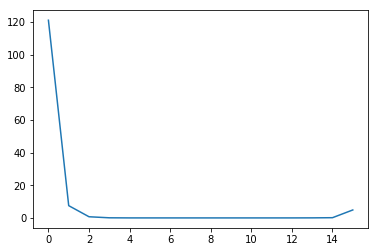

In [ ]:
print(erreur)
plot(erreur)
#On remarque que l'erreur ici, est minimale lorsque k vaut 8 c'est a dire lorsque h = 10**-8. Cela signifie que pour calculer de 
#maniere la plus précise possible le gradient de f, nous devons prendre h = 10**-8

In [ ]:
def FDhess(f,x,h) :
    Hessienne = []
    identite = np.identity(len(x))
    for i in range(len(x)):
        ligne_i = []
        for j in range(len(x)) :
            ligne_i.append((f(x+identite[i]*h+identite[j]*h)-f(x+identite[i]*h)-f(x+identite[j]*h)+f(x))/(h**2))
            #ligne_i.append((f(x+identite[i]*h+identite[j]*h)-f(x+identite[i]*h)-f(x+identite[j]*h)+f(x))/(h**2))
        Hessienne.append(ligne_i)
    return(Hessienne)

h = [10**(-k)for k in range(16)]
x = [1,0]
Hessienne_calcule = []
Hessienne_attendu = [[122,-40],[-40,20]]
erreur = []
for i in range(len(h)) :
    Hessienne_calcule.append(FDhess(f,x,h[i]))

In [ ]:
print(Hessienne_calcule)
#On remarque que lorsque l'on prends k >= 8 ( et donc h <= 10**-8), les valeurs retournées s'éloignent énormément des valeurs 
#cherchées et l'on obtient des valeurs vraiment très grandes. 
#On remarque que notre erreur est minimale pour h = 10**-6 ici.

[[[502.0, -60.0], [-60.0, 20.0]], [[147.40000000000035, -42.00000000000034], [-42.00000000000034, 19.999999999999925]], [[124.41400000000158, -40.20000000000579], [-40.20000000000579, 19.999999999988916]], [[122.24014000494776, -40.01999999836414], [-40.01999999836414, 19.999999999242846]], [[122.02400139216252, -40.001999934702326], [-40.001999934702326, 19.99999987845058]], [[122.00242593962683, -40.00021647243556], [-40.00021647243556, 19.999983891239022]], [[122.0001877300092, -39.99467423909664], [-39.99467423909664, 20.00177801164682]], [[122.21335055073725, -40.14566457044567], [-40.14566457044567, 19.717560917342784]], [[177.63568394002502, -17.7635683940025], [-17.7635683940025, 53.29070518200751]], [[0.0, -1776.3568394002502], [-1776.3568394002502, -1776.3568394002502]], [[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, 0.0]], [[0.0, -1776356839.4002507], [-1776356839.4002507, 0.0]], [[0.0, 177635683940.02502], [177635683940.02502, 177635683940.02502]], [[0.0, -17763568394002.504]

# Exercice 3 - méthode du gradient à pas fixe

Lorsqu'on cherche à minimiser une fonction $f$ définie sur $\mathbb{R}^n$, l'une des méthodes les plus élémentaires est la méthode de gradient. Elle consiste à construire une suite d'itérés $(x_k)_{k\in \mathbb{N}}$ de la manière suivante : partant d'un $x_0 \in \mathbb{R}^n$, pour tout $k \in \mathbb{N}$,
$$
x_{k+1} = x_k+\alpha_k d_k, \mbox{ avec } d_k = -\nabla f(x_k).
$$

Comme $d_k = -\nabla f(x_k)$ est une direction de descente ($\nabla f(x_k)^\top d_k < 0$), la suite ci-dessus fait nécessairement décroître $f$, quitte à prendre un pas constant $\alpha_k  = \alpha$ très petit.

+ Ecrire une fonction **GPF(x0,f,df,alpha,itmax)** qui fournit la suite décrite ci-dessus pour minimiser une fonction **f**, en partant du vecteur initial **x0** et en utilisant le pas fixe stocké dans **alpha**, sans faire plus de **itmax** itérations. L'argument **df** est le nom de la fonction qui calcule le gradient de **f**.

+ Pour mettre au point cette fonction, on commencera par faire un nombre fixe d'itérations et on la testera sur la fonction de Rosenbrock dont on connaît le minimum :
$$
p(x_1^2-x_2)^2+(1-x_1)^2.
$$
On pourra faire les essais avec $p = 10$.
Les points de départ standards pour cette fonction sont $(-1.2, 1)$ et $(6.39,-0.221)$.
Le temps de déboguer, on prendra **itmax** = 100, puis ensuite on le mettra à 1000.
Il faudra prendre le temps de choisir les pas fixes adaptés à chacun des deux points de départ.

Afin de constater que la méthode fonctionne, 
+ on fera un tracé des itérés construits, superposé aux contours de la fonction minimisée,
+ on fera un tracé en échelle logarithmique de la décroissance de la fonction $f$ en fonction des itérations.

In [ ]:
def GPF(x0,f,df,alpha,itmax):
    x = [x0]
    for i in range(0,itmax):
        gradient = df(x[i])
        gradient_neg = -1*np.array(gradient)
        a_d = alpha*np.array(gradient_neg)
        x.append(list(np.add(x[i],a_d)))
    return(x)
def df(x):
    p=10
    return(4*p*x[0]*(x[0]**2-x[1])-2*(1-x[0]),-2*p*(x[0]**2-x[1]))
def Rosenbrock(x) :
    p = 10
    return(p*(x[0]**2-x[1])**2+(1-x[0])**2)

In [ ]:
#Pour x0 = [-1.2,1] : si itmax = 1000 : alpha = [10**-2,10**-2]
#Pour x0 = [6.39,-0.221] : si itmax = 1000 : alpha = [10**-4,10**-4]

x0 = [-1.2,1]
x0_bis = [6.39,-0.221]
alpha = 10**-2
alpha_bis = 10**-4
itmax=1000
x_res = np.array(GPF(x0,Rosenbrock,df,alpha_bis,itmax))
x_res_bis = np.array(GPF(x0_bis,Rosenbrock,df,alpha_bis,itmax))

In [ ]:
x = arange(-1.5,1.5,0.01)
y = arange(-0.5,1.5,0.01)
X,Y = meshgrid(x,y)
Z = Rosenbrock([X,Y])

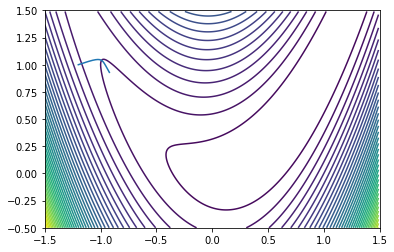

In [ ]:
plot(x_res[:,0],x_res[:,1])
xlim(-1.5,1.5)
ylim(-0.5,1.5)
contour(X,Y,Z,50)

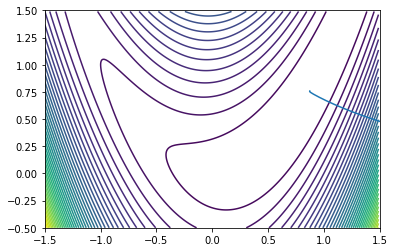

In [ ]:
plot(x_res_bis[:,0],x_res_bis[:,1])
xlim(-1.5,1.5)
ylim(-0.5,1.5)
contour(X,Y,Z,50)

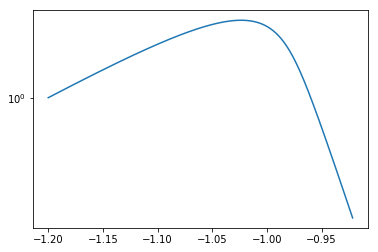

In [ ]:
plot(x_res[:,0],x_res[:,1])
yscale('log')

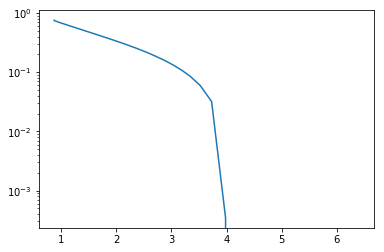

In [ ]:
plot(x_res_bis[:,0],x_res_bis[:,1])
yscale('log')

# Exercice 4 - recherche linéaire d'Armijo

On a observé ci-dessus que le pas fixe n'est pas forcément très pratique. De fait, il est rarement utilisé en pratique.

On utilise plutôt une **recherche linéaire** pour trouver un pas $\alpha_k$ adapté à chaque itération. Par souci de simplicité, on décrit ici une recherche linéaire basée sur 
+ la règle d'Armijo : on cherche un pas $\alpha_k$ qui vérifie la condition de décroissance suffisante
$$
f(x_k+\alpha_k d_k) \leq f(x_k) + c_1 \alpha_k \nabla f(x_k)^\top d_k,
$$
avec $c_1 \in \left]0,\dfrac{1}{2}\right[$. Une valeur classique $c_1$ est $10^{-4}$ ; 
+ un "backtracking" : on cherche $\alpha_k$ parmi les $\left\{\dfrac{1}{\beta^k}, k \in\mathbb{N}\right\}$.

On se propose de coder l'algorithme de recherche linéaire suivant dans une fonction 
**RLA(xk,dk,alpha0,f,ps)** : étant donnés l'itéré courant $x_k$, la direction de descente $d_k$, la fonction $f$ à minimiser et le produit scalaire **ps** contenant $\nabla f(x_k)^\top d_k$, on initialise le pas $\alpha$ à $\alpha_0$, puis tant que la condition d'Armijo n'est pas satisfaite, on divise $\alpha$ par $2$. La fonction **RLA** doit retourner la valeur du pas ainsi obtenue.

In [ ]:
def RLA(xk,dk,alpha0,f,ps) :
    alpha = alpha0
    c1 = 10**-4
    infe = f(xk+alpha*dk)
    supe = f(xk) + c1*alpha*ps
    while (infe > supe) :
        alpha = alpha/2
        infe = f(xk+alpha*dk)
        supe = f(xk) + c1*alpha*ps
    return(alpha)

# Exercice 5 - méthode de gradient globalisé

A partir de la fonction GPF(x0,f,df,alpha,itmax), écrire une fonction **GRLA(x0,f,df,alpha0,itmax)** qui fournit la suite 
$$
x_{k+1} = x_k+\alpha_k d_k, \mbox{ avec } d_k = -\nabla f(x_k).
$$
pour minimiser une fonction **f**, en partant du vecteur initial **x0**, mais cette fois en utilisant la recherche linéaire d'Armijo codée ci-dessus, initialisée à **alpha0** pour ajuster le pas $\alpha_k$ à chaque itération. 

On fera les mêmes tests que dans l'exercice 3, en initialisant la recherche linéaire avec $\alpha_0 = 1$ et on ajoutera le tracé de l'évolution du pas $\alpha$ au cours des itérations.

In [ ]:
def GRLA(x0,f,df,alpha0,itmax) :
    x = [x0]
    alpha = [alpha0]
    gradient = np.array(df(x0))
    dk = -1*(gradient)
    x.append(list(x[0] + alpha0*d0))
    for i in range(1,itmax):
            gradient = np.array(df(x[i]))
            dk = -1*gradient
            ps = np.dot(gradient.transpose(),dk)
            alpha_k = RLA(x[i],dk,alpha0,f,ps)
            x.append(list(x[i] + alpha_k*dk))
            alpha.append(alpha_k)
    return(x,alpha)
def df(x):
    p=10
    return(4*p*x[0]*(x[0]**2-x[1])-2*(1-x[0]),-2*p*(x[0]**2-x[1]))
def Rosenbrock(x) :
    p = 10
    return(p*(x[0]**2-x[1])**2+(1-x[0])**2)

In [ ]:
x0 = [-1.2,1]
x0_bis = [6.39,-0.221]
alpha0 = 1
itmax = 1000
x_res,alpha = GRLA(x0,Rosenbrock,df,alpha0,itmax)
x_res_bis,alpha_bis = GRLA(x0_bis,Rosenbrock,df,alpha0,itmax)
x_res = np.array(x_res)
x_res_bis = np.array(x_res_bis)

In [ ]:
x = arange(-1.5,1.5,0.01)
y = arange(-0.5,1.5,0.01)
X,Y = meshgrid(x,y)
Z = Rosenbrock([X,Y])

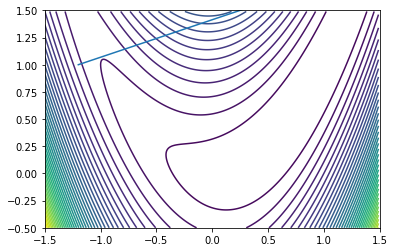

In [ ]:
plot(x_res[:,0],x_res[:,1])
xlim(-1.5,1.5)
ylim(-0.5,1.5)
contour(X,Y,Z,50)

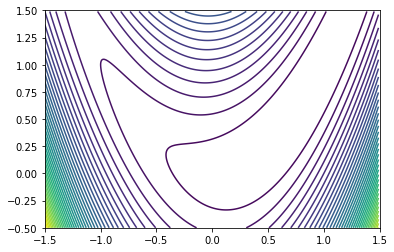

In [ ]:
plot(x_res_bis[:,0],x_res_bis[:,1])
xlim(-1.5,1.5)
ylim(-0.5,1.5)
contour(X,Y,Z,50)

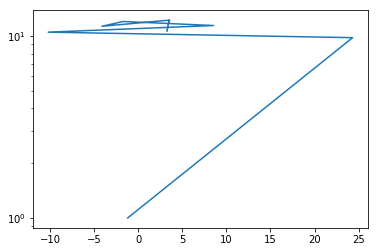

In [ ]:
plot(x_res[:,0],x_res[:,1])
yscale('log')

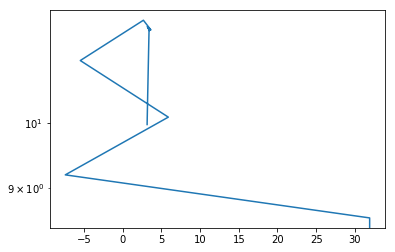

In [ ]:
plot(x_res_bis[:,0],x_res_bis[:,1])
# yscale('log')

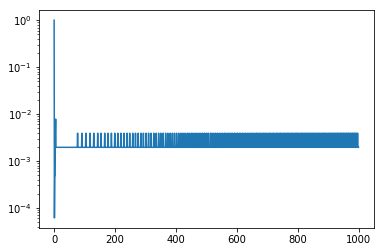

In [ ]:
plot(alpha)
yscale("log")

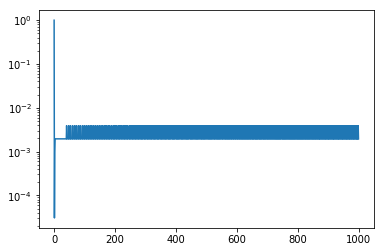

In [ ]:
plot(alpha_bis)
yscale("log")

# Exercice 6 - amélioration des critères d'arrêt

Maintenant que la fonction **GRLA** est au point, on peut essayer de mettre en place des critères d'arrêt plus réalistes :  
$$
k > itmax, 
\quad\mbox{ou}\quad
\max_{1\leq i\leq n}\left|
\dfrac{(\nabla f(x_k))_i (x_{k+1})_i}{f(x_{k+1})}
\right| 
\leq \varepsilon_g, 
\quad\mbox{ou}\quad
\max_{1\leq i\leq n}\left|
\dfrac{(x_{k+1})_i-(x_{k})_i}{(x_{k+1})_i}
\right| 
\leq \varepsilon_x.
$$

Ainsi, à partir de GRLA(x0,f,df,alpha0,itmax), construire une fonction **GRLA2(x0,f,df,alpha0,itmax,epsilg,epsilx)** qui remplace la boucle *for* en une boucle *while* avec les critères d'arrêt indiqués ci-dessus.

Refaire les mêmes tests que précédemment, en commençant avec $\varepsilon_g = \varepsilon_x = 10^{-4}$.

Remarque : en pratique, pour éviter les problèmes lorsque l'un des $(x_{k+1})_i$ ou $f(x_{k+1})$ devient nuls, on utilise plutôt les tests robustes suivants : 
$$
k > itmax, 
\quad\mbox{ou}\quad
\max_{1\leq i\leq n}\left|
\dfrac{(\nabla f(x_k))_i \max\{|(x_{k+1})_i|,typx_i\}}{\max\{|f(x_{k+1})|,typf\}}
\right| 
\leq \varepsilon_g, 
\quad\mbox{ou}\quad
\max_{1\leq i\leq n}\left|
\dfrac{(x_{k+1})_i-(x_{k})_i}{\max\{|(x_{k+1})_i|,typx_i\}}
\right| 
\leq \varepsilon_x.
$$

In [ ]:
def GRLA2(x0,f,df,alpha0,itmax,epsilg,epsilx) :
    k = 1
    x = [x0]
    alpha = [alpha0]
    gradient = np.array(df(x0))
    dk = -1*(gradient)
    x.append(list(x[0] + alpha0*d0))
    max_epsg = max(abs(gradient*x[1]/f(x[1])))
    max_epsx = max(abs((np.array(x[1])-np.array(x[0]))/(np.array(x[1]))))
    while (k<=itmax and max_epsg >epsilg and max_epsx >epsilx) :
            gradient = np.array(df(x[k]))
            dk = -1*gradient
            ps = np.dot(gradient.transpose(),dk)
            alpha_k = RLA(x[k],dk,alpha0,f,ps)
            x.append(list(x[k] + alpha_k*dk))
            alpha.append(alpha_k)
            max_epsg = max(abs(gradient*x[k+1]/f(x[k+1])))
            max_epsx = max(abs((np.array(x[k+1])-np.array(x[k]))/(np.array(x[k+1]))))
            k = k+1
    return(x,alpha)
def df(x):
    p=10
    return(4*p*x[0]*(x[0]**2-x[1])-2*(1-x[0]),-2*p*(x[0]**2-x[1]))
def Rosenbrock(x) :
    p = 10
    return(p*(x[0]**2-x[1])**2+(1-x[0])**2)

In [ ]:
x0 = [-1.2,1]
x0_bis = [6.39,-0.221]
alpha0 = 1
itmax = 10000
epsilg = 10**-4
epsilx = 10**-4

x_res,alpha = GRLA2(x0,Rosenbrock,df,alpha0,itmax,epsilg,epsilx)
x_res_bis,alpha_bis = GRLA2(x0_bis,Rosenbrock,df,alpha0,itmax,epsilg,epsilx)
x_res = np.array(x_res)
x_res_bis = np.array(x_res_bis)

In [ ]:
x = arange(-1.5,1.5,0.01)
y = arange(-0.5,1.5,0.01)
X,Y = meshgrid(x,y)
Z = Rosenbrock([X,Y])

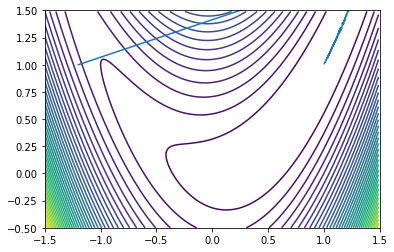

In [ ]:
plot(x_res[:,0],x_res[:,1])
xlim(-1.5,1.5)
ylim(-0.5,1.5)
contour(X,Y,Z,50)

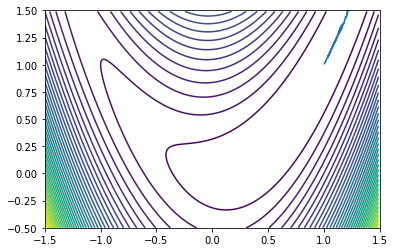

In [ ]:
plot(x_res_bis[:,0],x_res_bis[:,1])
xlim(-1.5,1.5)
ylim(-0.5,1.5)
contour(X,Y,Z,50)

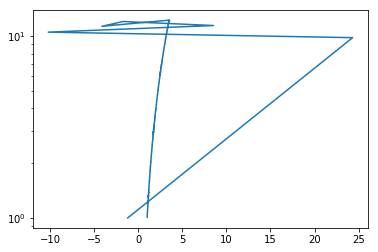

In [ ]:
plot(x_res[:,0],x_res[:,1])
yscale('log')

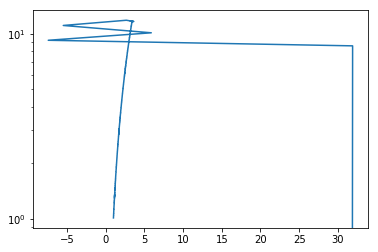

In [ ]:
plot(x_res_bis[:,0],x_res_bis[:,1])
yscale('log')

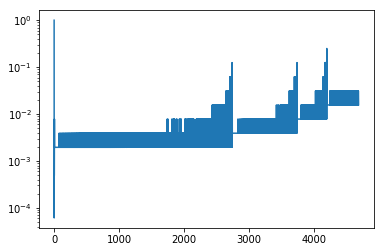

In [ ]:
plot(alpha)
yscale("log")

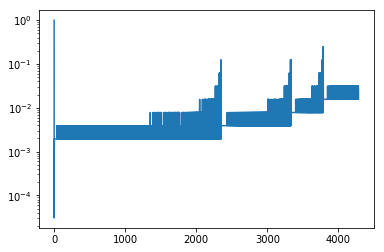

In [ ]:
plot(alpha_bis)
yscale("log")